In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'dataset.csv')

In [3]:
df.sort_index(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# number of applicants
f"No.of loan applicants = {df['Loan_ID'].nunique()}" 

'No.of loan applicants = 614'

In [6]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
# Replace 'Y' with 'Yes' and 'N' with 'No' in the 'Loan_Status' column
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 'Yes', 'N': 'No'})

In [10]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No


In [11]:
# Calculate the overall loan approval rate
approval_counts = df['Loan_Status'].value_counts()
overall_approval_rate = (approval_counts.get('Yes', 0) / len(df)) * 100

In [12]:
overall_approval_rate

68.72964169381108

In [13]:
# before filling nan values
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [14]:
# this function is gonna be used across the whole notebook to fillna values based on the ratio of the present column values
# this function is Chatgpt 3.5 generated and here is the prompt used:
# prompt: how to make a function to fillna() in a single column with ('Yes', 'No') values based on the ratio of the two values in the same column?
def fillna_with_ratio(df, column_name):
    # Calculate the ratio of 'Yes' and 'No' values in the specified column
    ratio_yes_no = df[column_name].value_counts(normalize=True).to_dict()

    # Function to fill missing values based on the ratio
    def fill_ratio(row):
        if pd.notna(row[column_name]):
            return row[column_name]
        else:
            # Replace NaN with 'Yes' or 'No' based on the calculated ratio
            return 'Yes' if pd.Series(['Yes', 'No']).sample(1, weights=[ratio_yes_no.get('Yes', 0), ratio_yes_no.get('No', 0)]).iloc[0] == 'Yes' else 'No'

    # Apply the fill_ratio function to the specified column
    df[column_name] = df.apply(fill_ratio, axis=1)

In [15]:
# Fill NaN values in the 'Married' column based on the ratio of 'Yes' and 'No'
fillna_with_ratio(df, 'Married')

In [16]:
# after filling nan values
# if you're married, you're most likely to apply for a loan
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [17]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [18]:
# before filling nan values
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [19]:
# this function is Chatgpt 3.5-generated and here is the prompt used:
# prompt:'how to make a function to fillna() in a single column with ('Male', 'Female') values based on the ratio of the two values in the same column?'
def fillna_with_ratio(df, column_name):
    # Calculate the ratio of 'Male' and 'Female' values in the specified column
    ratio_male_female = df[column_name].value_counts(normalize=True).to_dict()

    # Function to fill missing values based on the ratio
    def fill_ratio(row):
        if pd.notna(row[column_name]):
            return row[column_name]
        else:
            # Replace NaN with 'Male' or 'Female' based on the calculated ratio
            return 'Male' if pd.Series(['Male', 'Female']).sample(1, weights=[ratio_male_female.get('Male', 0), ratio_male_female.get('Female', 0)]).iloc[0] == 'Male' else 'Female'

    # Apply the fill_ratio function to the specified column
    df[column_name] = df.apply(fill_ratio, axis=1)

In [20]:
# Fill NaN values in the 'Gender' column based on the ratio of 'Male' and 'Female'
fillna_with_ratio(df, 'Gender')

In [21]:
# after filling nan values
# if your're a man, you're most likely to apply for a loan
df['Gender'].value_counts()

Gender
Male      499
Female    115
Name: count, dtype: int64

In [22]:
# To get the distribution of loan applicants based on gender and marital status 
distribution = df.groupby(['Gender', 'Married']).size().reset_index(name='Count')

In [23]:
distribution

,Gender,Married,Count
0,Female,No,81
1,Female,Yes,34
2,Male,No,132
3,Male,Yes,367


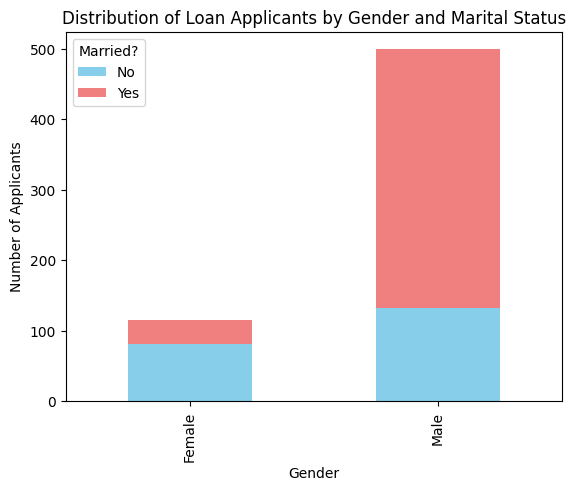

In [24]:
# Pivot the "distribution" DataFrame for better visualization
pivot_distribution = distribution.pivot(index='Gender', columns='Married', values='Count')

# Plotting the bar plot
pivot_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Applicants by Gender and Marital Status')

# Display the legend
plt.legend(title='Married?')

In [25]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No


In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [27]:
# i assume that the average number of dependents of the applicants with 3+ dependents = 4
df['Dependents'] = df['Dependents'].replace({'3+':'4'})

In [28]:
df['Dependents'] = df['Dependents'].astype(float)

In [29]:
df['Dependents'].mean()

0.8480801335559266

In [30]:
df['Dependents'] = df['Dependents'].fillna(1)

In [31]:
df['Dependents'] = df['Dependents'].astype(int)

In [32]:
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [33]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No


In [34]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [35]:
# Graduates seem highly likely to apply for loan more than non-graduates
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [36]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [37]:
# before filling nan values
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [38]:
def fillna_with_ratio(df, column_name):
    # Calculate the ratio of 'Yes' and 'No' values in the specified column
    ratio_yes_no = df[column_name].value_counts(normalize=True).to_dict()

    # Function to fill missing values based on the ratio
    def fill_ratio(row):
        if pd.notna(row[column_name]):
            return row[column_name]
        else:
            # Replace NaN with 'Yes' or 'No' based on the calculated ratio
            return 'Yes' if pd.Series(['Yes', 'No']).sample(1, weights=[ratio_yes_no.get('Yes', 0), ratio_yes_no.get('No', 0)]).iloc[0] == 'Yes' else 'No'

    # Apply the fill_ratio function to the specified column
    df[column_name] = df.apply(fill_ratio, axis=1)

In [39]:
fillna_with_ratio(df, 'Self_Employed')

In [40]:
# after filling nan values
# if you're not self employed, you're most likely to apply for a loan
df['Self_Employed'].value_counts()

Self_Employed
No     527
Yes     87
Name: count, dtype: int64

In [41]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No


In [42]:
# checking nan values in 'ApplicantIncome' column
df['ApplicantIncome'].isna().sum()

0

In [43]:
# checking nan values in 'CoapplicantIncome' column
df['CoapplicantIncome'].isna().sum()

0

In [44]:
# converting 'CoapplicantIncome' column to integer to be consistent
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)

In [45]:
# Getting the range of ApplicantIncome and CoapplicantIncome
income_range = df[['ApplicantIncome', 'CoapplicantIncome']].describe().loc[['min', 'max']]

In [46]:
income_range

,ApplicantIncome,CoapplicantIncome
min,150.0,0.0
max,81000.0,41667.0


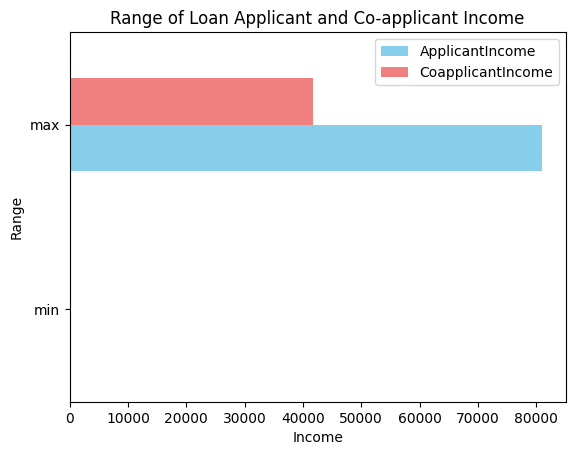

In [47]:
# Plotting the horizontal bar plot
income_range.plot(kind='barh', color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Range')
plt.title('Range of Loan Applicant and Co-applicant Income')

# Display the plot
plt.show()

In [48]:
# To get the distribution of loan applicants based on gender and Education
distribution = df.groupby(['Gender', 'Education']).size().reset_index(name='Count')

In [49]:
distribution

,Gender,Education,Count
0,Female,Graduate,95
1,Female,Not Graduate,20
2,Male,Graduate,385
3,Male,Not Graduate,114


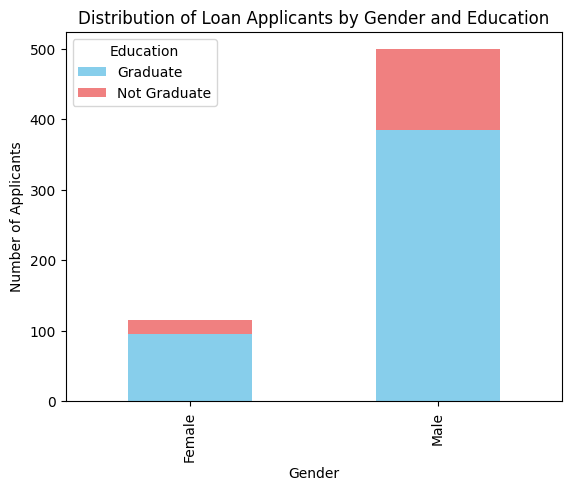

In [50]:
# Pivot the "distribution" DataFrame for better visualization
pivot_distribution = distribution.pivot(index='Gender', columns='Education', values='Count')

# Plotting the bar plot
pivot_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Applicants by Gender and Education')

# Display the plot
plt.show()

In [51]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,No


In [52]:
# Filling NaN values with a median value
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

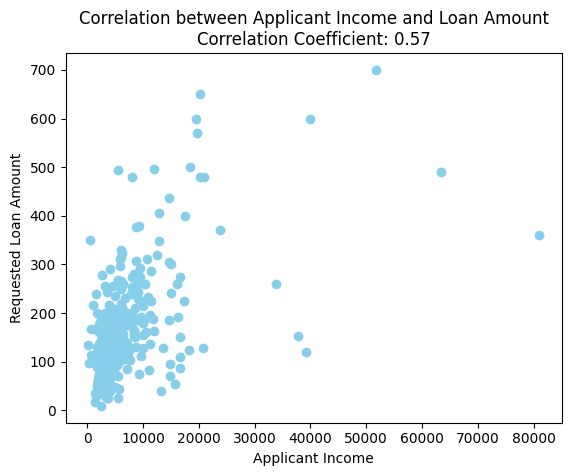

In [53]:
# Calculate the correlation coefficient
correlation_coefficient = df['ApplicantIncome'].corr(df['LoanAmount'])

# Plotting the scatter plot
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], color='skyblue')

# Adding labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Requested Loan Amount')
plt.title('Correlation between Applicant Income and Loan Amount\nCorrelation Coefficient: {:.2f}'.format(correlation_coefficient))

# Display the plot
plt.show()

In [54]:
# replacing nan values of 'Loan_Amount_Term' column with a mode value
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [55]:
def fillna_with_ratio(df, column_name):
    # Calculate the ratio of '1.0' and '0.0' values in the specified column
    ratio_1_0 = df[column_name].value_counts(normalize=True).to_dict()

    # Function to fill missing values based on the ratio
    def fill_ratio(row):
        if pd.notna(row[column_name]):
            return row[column_name]
        else:
            # Replace NaN with '1.0' or '0.0' based on the calculated ratio
            return 1.0 if pd.Series([1.0, 0.0]).sample(1, weights=[ratio_1_0.get(1.0, 0), ratio_1_0.get(0.0, 0)]).iloc[0] == 1.0 else 0.0

    # Apply the fill_ratio function to the specified column
    df[column_name] = df.apply(fill_ratio, axis=1)

In [56]:
# replacing nan values of 'Credit_History' column based on the ratio of '1.0' and '0.0'
fillna_with_ratio(df, 'Credit_History')

In [57]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,No


In [58]:
# relation between 'Credit_History' and the loan approval rate
approval_rate = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()

In [59]:
approval_rate

Loan_Status,No,Yes
Credit_History,,
0.0,0.882979,0.117021
1.0,0.209615,0.790385


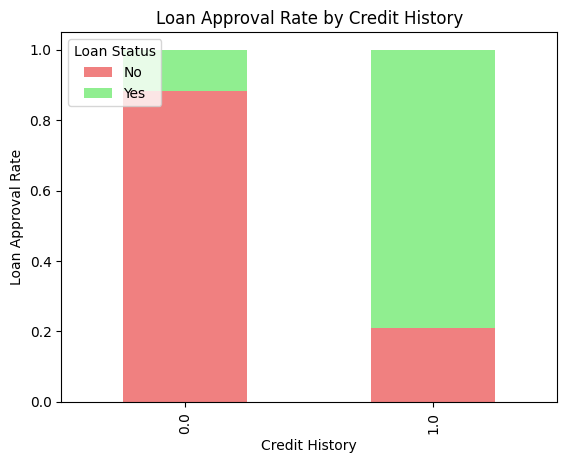

In [60]:
# Plotting the stacked bar plot
approval_rate.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])

# Adding labels and title
plt.xlabel('Credit History')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rate by Credit History')
plt.legend(title='Loan Status', loc='upper left')

# Display the plot
plt.show()

In [61]:
# getting the pecentage of loan applicants with good credit history that have been approved for loans:
# Filter DataFrame for good credit history (Credit_History = 1.0)
good_credit_applicants = df[df['Credit_History'] == 1.0]

# Calculate the percentage of approved loans among applicants with good credit history
approval_percentage = (good_credit_applicants['Loan_Status'] == 'Yes').mean() * 100

In [62]:
print(f"Percentage of approved loans for applicants with good credit history: {approval_percentage:.2f}%")

Percentage of approved loans for applicants with good credit history: 79.04%


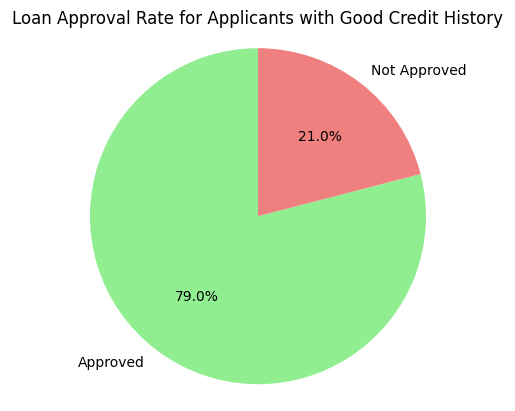

In [63]:
# Plotting the pie chart
labels = ['Approved', 'Not Approved']
sizes = [approval_percentage, 100 - approval_percentage]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Loan Approval Rate for Applicants with Good Credit History')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Display the plot
plt.show()

In [64]:
# finding differences in loan approval rates between urban, smiurban and rural property areas
# Group by 'Property_Area' and calculate the loan approval rate
approval_rate = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()

In [65]:
approval_rate

Loan_Status,No,Yes
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


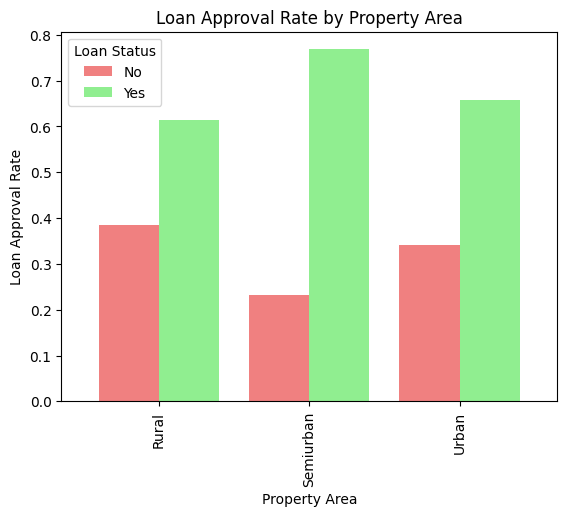

In [66]:
# Plotting the grouped bar plot
approval_rate.plot(kind='bar', color=['lightcoral', 'lightgreen'], width=0.8)

# Adding labels and title
plt.xlabel('Property Area')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rate by Property Area')
plt.legend(title='Loan Status', loc='upper left')

# Display the plot
plt.show()

In [67]:
# number of 'Dependents' impact on the loan approval rate
approval_rate = df.groupby('Dependents')['Loan_Status'].value_counts(normalize=True).unstack()

In [68]:
approval_rate

Loan_Status,No,Yes
Dependents,,
0,0.310145,0.689855
1,0.358974,0.641026
2,0.247525,0.752475
4,0.352941,0.647059


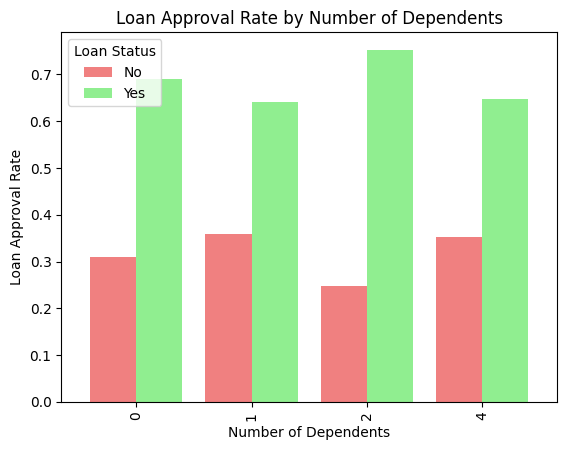

In [69]:
# Plotting the grouped bar plot
ax = approval_rate.plot(kind='bar', color=['lightcoral', 'lightgreen'], width=0.8)

# Adding labels and title
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rate by Number of Dependents')
plt.legend(title='Loan Status', loc='upper left')

# Display the plot
plt.show()

In [70]:
# education impact loan approval rates
# Group by 'Education' and calculate the loan approval rate
approval_rate = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()

In [71]:
approval_rate

Loan_Status,No,Yes
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


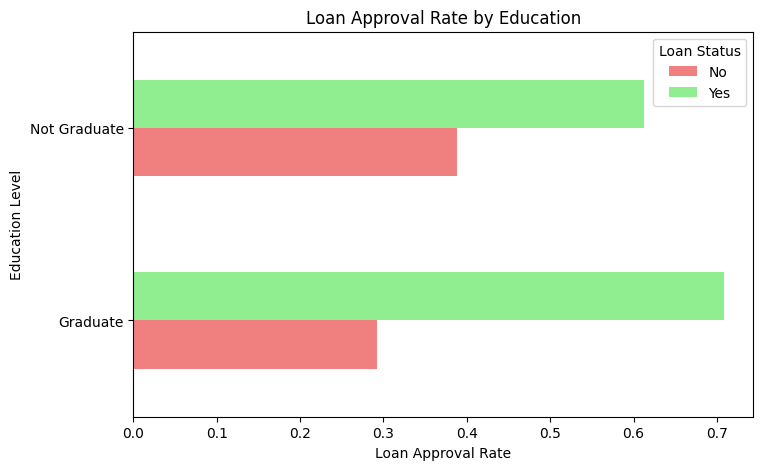

In [72]:
# Plotting a horizontal bar plot for better readability
ax = approval_rate.plot(kind='barh', color=['lightcoral', 'lightgreen'], figsize=(8, 5))

# Adding labels and title
plt.xlabel('Loan Approval Rate')
plt.ylabel('Education Level')
plt.title('Loan Approval Rate by Education')
plt.legend(title='Loan Status', loc='upper right')

# Display the plot
plt.show()

In [73]:
# loan_amount_term impact loan approval rates
# Group by 'Loan_Amount_Term' and calculate the loan approval rate
approval_rate = df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True).unstack()

In [74]:
approval_rate

Loan_Status,No,Yes
Loan_Amount_Term,,
12.0,NaN,1.000000
36.0,1.000000,NaN
60.0,NaN,1.000000
84.0,0.250000,0.750000
120.0,NaN,1.000000
180.0,0.340909,0.659091
240.0,0.250000,0.750000
300.0,0.384615,0.615385
360.0,0.302281,0.697719


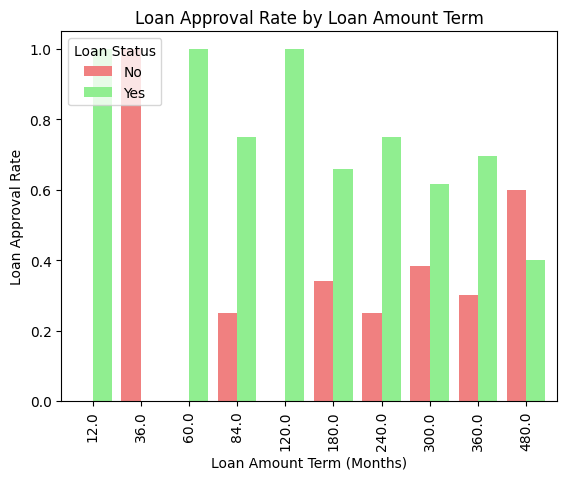

In [75]:
# Plotting the grouped bar plot
approval_rate.plot(kind='bar', color=['lightcoral', 'lightgreen'], width=0.8)

# Adding labels and title
plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rate by Loan Amount Term')
plt.legend(title='Loan Status', loc='upper left')

# Display the plot
plt.show()

In [76]:
# How does the requested loan amount vary per property area?
# Group by 'Property_Area' and calculate the average loan amount
average_loan_amount = df.groupby('Property_Area')['LoanAmount'].mean()

In [77]:
average_loan_amount

Property_Area
Rural        151.446927
Semiurban    145.128755
Urban        141.425743
Name: LoanAmount, dtype: float64

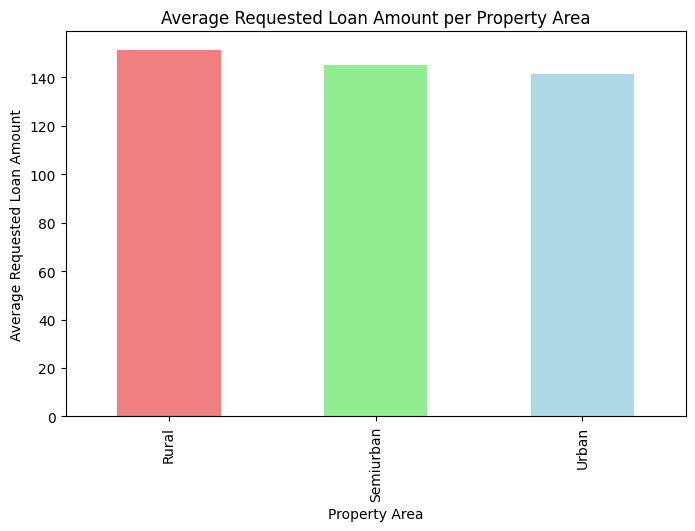

In [78]:
# Plotting the bar plot
plt.figure(figsize=(8, 5))
average_loan_amount.plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Property Area')
plt.ylabel('Average Requested Loan Amount')
plt.title('Average Requested Loan Amount per Property Area')
plt.show()

In [79]:
# Saving the cleansed dataset to a new CSV file
df.to_csv('cleansed_dataset.csv', index=False)